In [1]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_excel('PorCorreo.xlsx')
df.head(2)

,Unnamed: 0,EMAIL,SBol_Vend,Prom_Pagado,Sum_Pagado,%_Promo,Prom_Horas_Ant,Venta_Ant,Recencia,PAGO_EFECTIVO,PAGO_TARJETA,DESC_ADULTO,DESC_DISCAPACIDAD,DESC_ESTUDIANTE,DESC_MENOR,DESC_PETFRIENDLY,DESC_PROFESOR,DESC_PROMOCION ESPECIAL,DESC_SENECTUD
0,0,00-MAZA.ESQUISTOSO@ICLOUD.COM,4,953.664978,3814.659912,6.25,2.5,0.75,189,1,0,0,0,0,0,0,0,1,0
1,1,000047787@LAMAR.ORG.MX,1,609.909973,609.909973,0.00,16.0,0.00,52,0,1,0,0,1,0,0,0,0,0


In [3]:
def GetClustersMoreThanOne(df):
    Col=list(df.columns).index('EMAIL')
    dfMoreThanOne=df[df['SBol_Vend']>1].copy()
    X = dfMoreThanOne[dfMoreThanOne.columns[Col+1:]]
    # 1. Crea una instancia del escalador Min-Max
    minmax_scaler = MinMaxScaler()
    # 2. Aplica el ajuste y la transformación
    X_escalado = minmax_scaler.fit_transform(X)
    # Elegir un valor para min_samples (por ejemplo, 2 veces el número de dimensiones)
    min_samples_val = 2*len(X.columns)
    X_escalado = pd.DataFrame(X_escalado, columns=X.columns)
    # --- Fin del paso de escalado ---

    # 3. Encontrar la K óptima (usando el Coeficiente de Silueta)
    max_silhouette_score = -1
    optimal_k = 0
    K_range = range(2, 10)
    
    for k in K_range:
        kmeans_model = KMeans(n_clusters=k, n_init='auto', random_state=42)
        kmeans_model.fit(X_escalado)
        score = silhouette_score(X_escalado, kmeans_model.labels_)
        if score > max_silhouette_score:
            max_silhouette_score = score
            optimal_k = k
    print(f"El número óptimo de clusters (K) es: {optimal_k}")
    
    # 4. Fase de Entrenamiento: Entrenar el modelo final con la K óptima
    modelo_entrenado = KMeans(n_clusters=optimal_k, n_init='auto', random_state=42)
    modelo_entrenado.fit(X_escalado)
    dfMoreThanOne['Cluster'] = modelo_entrenado.labels_
    
    # 5. Analizar el perfil de cada cluster
    cluster_profile = dfMoreThanOne.groupby('Cluster')[X.columns].mean().round(2)
    
    print("\n--- Perfil promedio de cada Cluster ---")
    print(cluster_profile)

    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Perform PCA to reduce to 2 dimensions
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_escalado) # Assuming X_escalado is your scaled data
    
    # Create a new DataFrame with the PCA results and cluster labels
    pca_df = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])
    pca_df['Cluster'] = dfMoreThanOne['Cluster'].values
    
    # Visualize the clusters in 2D
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='principal component 1', y='principal component 2', hue='Cluster', data=pca_df, palette="Accent", legend='full')
    plt.title('2D PCA of Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    # Save the plot as a PNG file
    plt.savefig('ClustersMoreThanOne.png')
    
    plt.show()

    return dfMoreThanOne

In [4]:
def GetClusters4One(df):
    dfOne=df[df['SBol_Vend']==1].copy()
    Col=list(df.columns).index('EMAIL')
    X = dfOne[dfOne.columns[Col+1:]]
    # 1. Crea una instancia del escalador robusto
    robust_scaler = RobustScaler()
    # 2. Aplica el ajuste y la transformación
    X_escalado = robust_scaler.fit_transform(X)
    
    # Elegir un valor para min_samples (por ejemplo, 2 veces el número de dimensiones)
    min_samples_val = 2*len(X.columns)
    X_escalado = pd.DataFrame(X_escalado, columns=X.columns)
    # --- Fin del paso de escalado ---

    # 3. Encontrar la K óptima (usando el Coeficiente de Silueta)
    max_silhouette_score = -1
    optimal_k = 0
    K_range = range(2, 10)
    
    for k in K_range:
        kmeans_model = KMeans(n_clusters=k, n_init='auto', random_state=42)
        kmeans_model.fit(X_escalado)
        score = silhouette_score(X_escalado, kmeans_model.labels_)
        if score > max_silhouette_score:
            max_silhouette_score = score
            optimal_k = k
    print(f"El número óptimo de clusters (K) es: {optimal_k}")
    
    # 4. Fase de Entrenamiento: Entrenar el modelo final con la K óptima
    modelo_entrenado = KMeans(n_clusters=optimal_k, n_init='auto', random_state=42)
    modelo_entrenado.fit(X_escalado)
    dfOne['Cluster'] = modelo_entrenado.labels_
    dfOne['Cluster'] = np.where(dfOne['Cluster'] == 0, 7, dfOne['Cluster'])
    dfOne['Cluster'] = np.where(dfOne['Cluster'] == 1, 8, dfOne['Cluster'])
    
    # 5. Analizar el perfil de cada cluster
    cluster_profile = dfOne.groupby('Cluster')[X.columns].mean().round(2)
    
    print("\n--- Perfil promedio de cada Cluster ---")
    print(cluster_profile)

    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Perform PCA to reduce to 2 dimensions
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_escalado) # Assuming X_escalado is your scaled data
    
    # Create a new DataFrame with the PCA results and cluster labels
    pca_df = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])
    pca_df['Cluster'] = dfOne['Cluster'].values
    
    # Visualize the clusters in 2D
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='principal component 1', y='principal component 2', hue='Cluster', data=pca_df, palette="Accent", legend='full')
    plt.title('2D PCA of Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    # Save the plot as a PNG file
    plt.savefig('Clusters4One.png')
    
    plt.show()

    return dfOne

El número óptimo de clusters (K) es: 4

--- Perfil promedio de cada Cluster ---
         SBol_Vend  Prom_Pagado  Sum_Pagado  %_Promo  Prom_Horas_Ant  \
Cluster                                                                
0             5.51       949.25     5236.20     6.29           72.69   
1             5.55      1003.41     5475.40     0.80           55.75   
2             4.07       756.30     3217.87     3.71           90.49   
3             4.83       818.36     3935.37     0.87          181.14   

         Venta_Ant  Recencia  PAGO_EFECTIVO  PAGO_TARJETA  DESC_ADULTO  \
Cluster                                                                  
0             0.61    422.48            0.0           1.0         0.00   
1             0.40    427.44            1.0           0.0         1.00   
2             0.65    441.63            1.0           0.0         0.00   
3             0.81    490.12            0.0           1.0         0.68   

         DESC_DISCAPACIDAD  DESC_ESTUDIANT

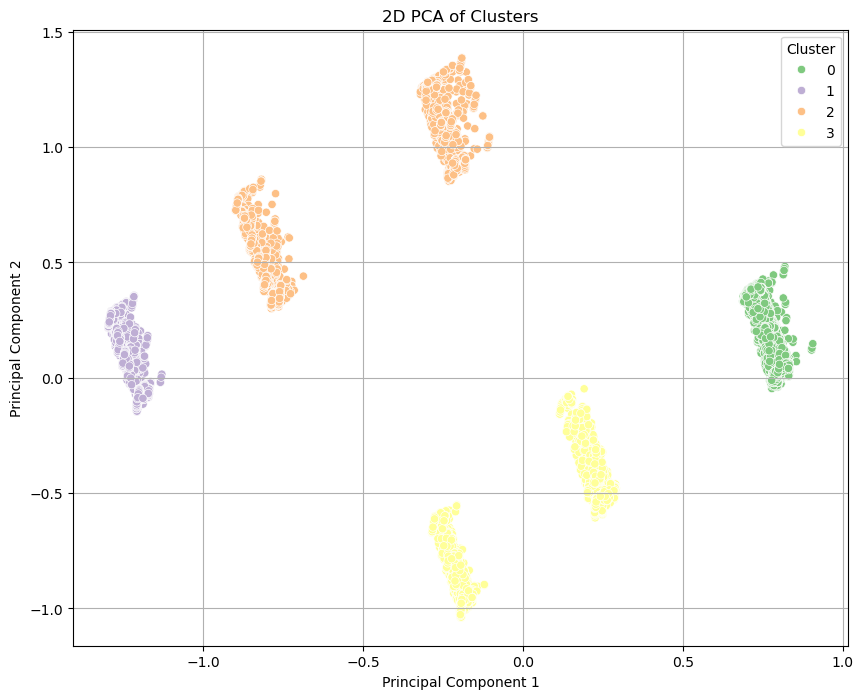

In [5]:
df1=GetClustersMoreThanOne(df)

El número óptimo de clusters (K) es: 2

--- Perfil promedio de cada Cluster ---
         SBol_Vend  Prom_Pagado  Sum_Pagado  %_Promo  Prom_Horas_Ant  \
Cluster                                                                
7              1.0       932.57      932.57     2.28           30.97   
8              1.0       715.61      715.61     1.35          631.71   

         Venta_Ant  Recencia  PAGO_EFECTIVO  PAGO_TARJETA  DESC_ADULTO  \
Cluster                                                                  
7             0.44    536.45           0.65          0.35         0.50   
8             1.00    482.57           0.58          0.42         0.38   

         DESC_DISCAPACIDAD  DESC_ESTUDIANTE  DESC_MENOR  DESC_PETFRIENDLY  \
Cluster                                                                     
7                      0.0             0.02        0.10               0.0   
8                      0.0             0.04        0.08               0.0   

         DESC_PROFESOR  D

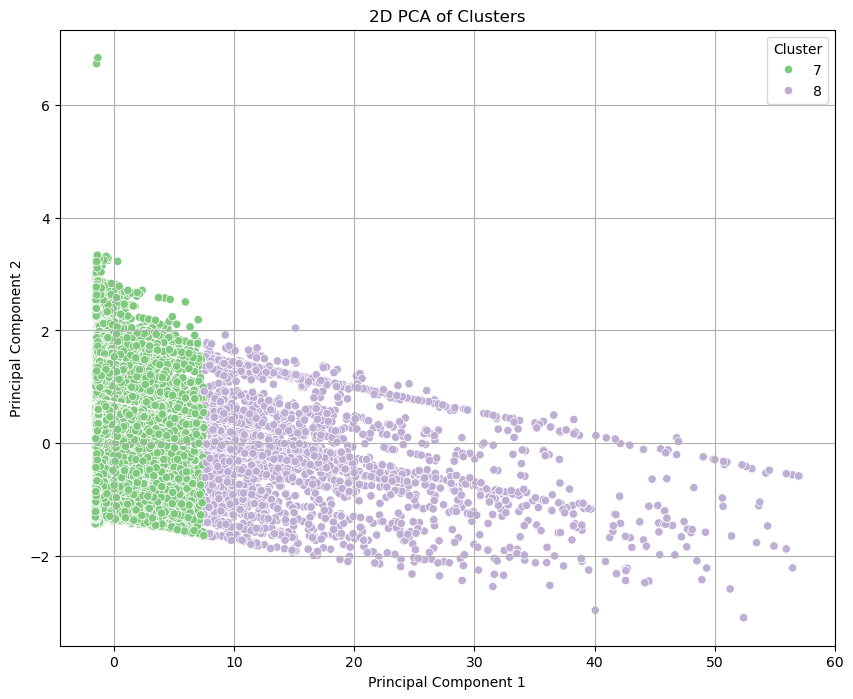

In [6]:
df2=GetClusters4One(df)

In [7]:
#df2['Cluster'] = np.where(df2['Cluster'] == 0, 7, df2['Cluster'])
#df2['Cluster'] = np.where(df2['Cluster'] == 1, 8, df2['Cluster'])

In [8]:
df_concatenado = pd.concat([df1, df2], ignore_index=True)

In [9]:
df_concatenado

,Unnamed: 0,EMAIL,SBol_Vend,Prom_Pagado,Sum_Pagado,%_Promo,Prom_Horas_Ant,Venta_Ant,Recencia,PAGO_EFECTIVO,PAGO_TARJETA,DESC_ADULTO,DESC_DISCAPACIDAD,DESC_ESTUDIANTE,DESC_MENOR,DESC_PETFRIENDLY,DESC_PROFESOR,DESC_PROMOCION ESPECIAL,DESC_SENECTUD,Cluster
0,0,00-MAZA.ESQUISTOSO@ICLOUD.COM,4,953.664978,3814.659912,6.25,2.5,0.75,189,1,0,0,0,0,0,0,0,1,0,2
1,3,0022ANDREAGONZALEZ@GMAIL.COM,2,504.309998,1008.619995,0.00,24.5,0.50,780,0,1,0,0,1,0,0,0,0,0,3
2,7,01MENDEZ.CESAR@GMAIL.COM,9,1112.066772,10008.600586,5.00,10.0,1.00,182,0,1,0,0,0,0,0,0,1,0,0
3,10,0209396@UP.ED.MX,2,1034.479980,2068.959961,5.00,4.0,1.00,797,0,1,1,0,0,0,0,0,0,0,3
4,11,0209396@UP.EDU.MX,8,892.562500,7140.500000,10.00,7.5,0.50,686,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137138,137138,ángel.álvarez.rodríguez@ejemplo.com,1,1142.500000,1142.500000,5.00,1.0,0.00,34,1,0,0,0,0,0,0,0,1,0,7
137139,137139,édgar.nava@ejemplo.com,1,985.340027,985.340027,10.00,15.0,1.00,685,1,0,0,0,0,0,0,0,1,0,7
137140,137140,óscar.adrián.fonseca.ramirez@ejemplo.com,1,754.309998,754.309998,0.00,55.0,1.00,797,1,0,1,0,0,0,0,0,0,0,7
137141,137141,óscar.alejandro.romero@ejemplo.com,1,1134.310059,1134.310059,5.00,4.0,1.00,102,1,0,0,0,0,0,0,0,1,0,7
